In [1]:
import ROOT,glob,math,os
from array import array

Welcome to JupyROOT 6.18/00


In [2]:
h1=ROOT.TH1F("dimuon_mass","dimuon_mass",200,0,10)
h2=ROOT.TH1F("dielectron_mass","dielectron_mass",200,0,10)
hm1=ROOT.TH1F("muon_1_pt","muon_1_pt",400,0,100)
hm2=ROOT.TH1F("muon_2_pt","muon_2_pt",400,0,100)
he1=ROOT.TH1F("electron_1_pt","electron_1_pt",400,0,100)
he2=ROOT.TH1F("electron_2_pt","electron_2_pt",400,0,100)

In [23]:
#e:11 muon:13
path="ntuple.root"
f=ROOT.TFile(path,"r")
t=f.Get("tau")
N=t.GetEntries()
count=0
All=0
for i in range(N):
    t.GetEntry(i)
    if abs(t.mc_pdgId[3])==13:
        m1=ROOT.TLorentzVector()
        e1=ROOT.TLorentzVector()
        m1.SetPtEtaPhiM(t.mc_pt[3],t.mc_eta[3],t.mc_phi[3],t.mc_m[3])
        e1.SetPtEtaPhiM(t.mc_pt[5],t.mc_eta[5],t.mc_phi[5],t.mc_m[5])
        m2=ROOT.TLorentzVector()
        e2=ROOT.TLorentzVector()
        m2.SetPtEtaPhiM(t.mc_pt[4],t.mc_eta[4],t.mc_phi[4],t.mc_m[4])
        e2.SetPtEtaPhiM(t.mc_pt[6],t.mc_eta[6],t.mc_phi[6],t.mc_m[6])

        dim=ROOT.TLorentzVector()
        die=ROOT.TLorentzVector()
        dim=m1+m2
        die=e1+e2
        
        b=abs(m1.Eta())<2.5 and abs(m2.Eta())<2.5 and abs(e1.Eta())<2.47 and abs(e2.Eta())<2.47
        B=e1.Pt()/1000.0>4.5 and e2.Pt()/1000.0>4.5 and m1.Pt()/1000.0>2 or m2.Pt()/1000.0>2
        
        if dim.M()/1000.0>9.2 and b and B:
            All=All+1
            mpt=sorted([t.mc_pt[3],t.mc_pt[4]])
            hm1.Fill(mpt[1]/1000.0)
            hm2.Fill(mpt[0]/1000.0)
            ept=sorted([t.mc_pt[5],t.mc_pt[6]])
            he1.Fill(ept[1]/1000.0)
            he2.Fill(ept[0]/1000.0)
            h1.Fill(dim.M()/1000.0)
            h2.Fill(die.M()/1000.0)
            b1=m1.Pt()/1000.0>6 and m2.Pt()/1000.0>6
            b2=(m1.Pt()/1000.0>14 or m2.Pt()/1000.0>14) and (e1.Pt()/1000.0>17 or e2.Pt()/1000.0>17)
            
            #print(i,b,b1,b2)
            if b2 or b1:
                count=count+1
        #print(dim.M(),die.M(),t.mc_m[1],t.mc_m[2])
    else:
        m1=ROOT.TLorentzVector()
        e1=ROOT.TLorentzVector()
        e1.SetPtEtaPhiM(t.mc_pt[3],t.mc_eta[3],t.mc_phi[3],t.mc_m[3])
        m1.SetPtEtaPhiM(t.mc_pt[5],t.mc_eta[5],t.mc_phi[5],t.mc_m[5])
        m2=ROOT.TLorentzVector()
        e2=ROOT.TLorentzVector()
        e2.SetPtEtaPhiM(t.mc_pt[4],t.mc_eta[4],t.mc_phi[4],t.mc_m[4])
        m2.SetPtEtaPhiM(t.mc_pt[6],t.mc_eta[6],t.mc_phi[6],t.mc_m[6])

        dim=ROOT.TLorentzVector()
        die=ROOT.TLorentzVector()
        dim=m1+m2
        die=e1+e2
        
        b=abs(m1.Eta())<2.5 and abs(m2.Eta())<2.5 and abs(e1.Eta())<2.47 and abs(e2.Eta())<2.47
        B=e1.Pt()/1000.0>4.5 and e2.Pt()/1000.0>4.5 and m1.Pt()/1000.0>2 or m2.Pt()/1000.0>2
        
        if dim.M()/1000.0>9.2 and b and B:
            All=All+1
            mpt=sorted([t.mc_pt[5],t.mc_pt[6]])
            hm1.Fill(mpt[1]/1000.0)
            hm2.Fill(mpt[0]/1000.0)
            ept=sorted([t.mc_pt[3],t.mc_pt[4]])
            he1.Fill(ept[1]/1000.0)
            he2.Fill(ept[0]/1000.0)
            h1.Fill(dim.M()/1000.0)
            h2.Fill(die.M()/1000.0)
            b1=m1.Pt()/1000.0>6 and m2.Pt()/1000.0>6
            b2=(m1.Pt()/1000.0>14 or m2.Pt()/1000.0>14) and (e1.Pt()/1000.0>17 or e2.Pt()/1000.0>17)
            #print(i,b,b1,b2)
            if  b2 or b1:
                count=count+1
        #print(dim.M(),die.M(),t.mc_m[1],t.mc_m[2])
print(count/(All*1.0))

0.1898188093183779


Info in <TCanvas::Print>: jpg file figures/Mass_muonshell.jpg has been created
Info in <TCanvas::Print>: pdf file figures/Mass_muonshell.pdf has been created


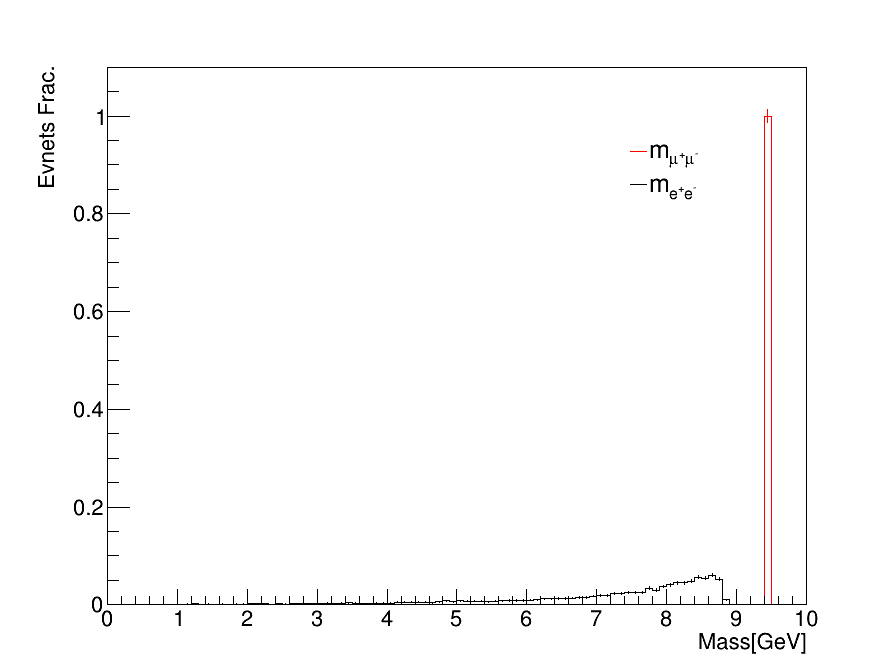

In [4]:
rebin=2
h1.Rebin(rebin)
h2.Rebin(rebin)
h1.Scale(1/h1.Integral())
h2.Scale(1/h2.Integral())
h1.GetXaxis().SetRangeUser(0,10)
h1.GetYaxis().SetRangeUser(0,1.1)
h1.SetNameTitle("","")
h1.GetXaxis().SetTitle("Mass[GeV]")
h1.GetYaxis().SetTitle("Evnets Frac.")
h1.SetLineColor(2)
h2.SetLineColor(1)
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
#c1.SetLogy()
c1.SetLeftMargin(0.12)
#print(c1.GetLeftMargin())
ROOT.gStyle.SetOptStat(0)
h1.Draw("hist e")
h2.Draw("same hist e")
t=ROOT.TLegend(0.7,0.7,0.8,0.8)
t.AddEntry(h1,"m_{#mu^{+}#mu^{-}}","l")
t.AddEntry(h2,"m_{e^{+}e^{-}}","lp")
t.SetBorderSize(0)
t.SetTextSize(0.04)
t.Draw()
c1.Draw()
name="Mass_muonshell"
c1.SaveAs("figures/"+name+".jpg")
c1.SaveAs("figures/"+name+".pdf")

Info in <TCanvas::Print>: jpg file figures/Pt_muonshell.jpg has been created
Info in <TCanvas::Print>: pdf file figures/Pt_muonshell.pdf has been created


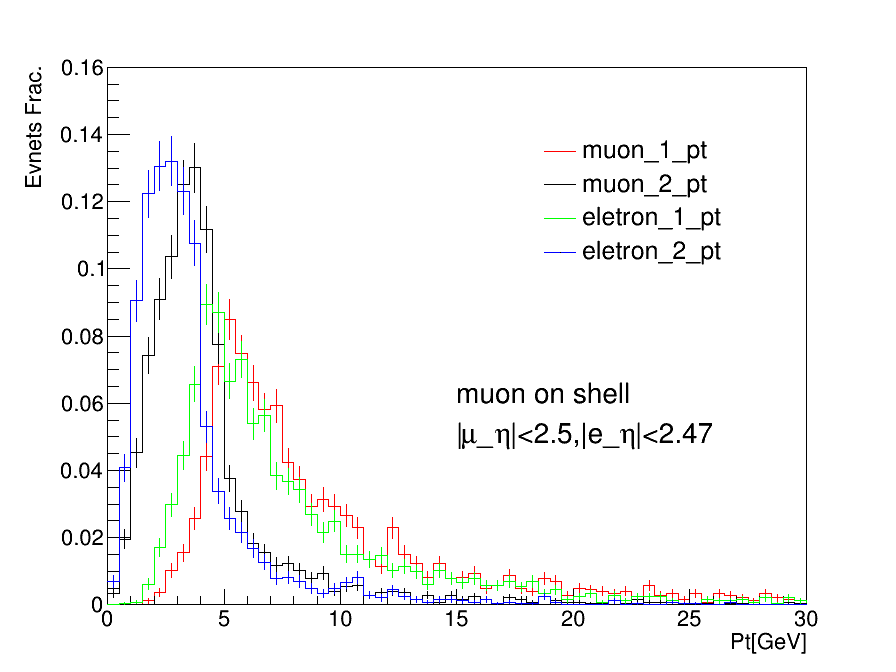

In [4]:
rebin=2
hm1.Rebin(rebin)
hm2.Rebin(rebin)
he1.Rebin(rebin)
he2.Rebin(rebin)
hm1.Scale(1/hm1.Integral())
hm2.Scale(1/hm2.Integral())
he1.Scale(1/he1.Integral())
he2.Scale(1/he2.Integral())
hm1.GetXaxis().SetRangeUser(0,30)
hm1.GetYaxis().SetRangeUser(0,0.16)
hm1.SetNameTitle("","")
hm1.GetXaxis().SetTitle("Pt[GeV]")
hm1.GetYaxis().SetTitle("Evnets Frac.")
hm1.SetLineColor(2)
hm2.SetLineColor(1)
he1.SetLineColor(3)
he2.SetLineColor(4)
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
#c1.SetLogy()
c1.SetLeftMargin(0.12)
#print(c1.GetLeftMargin())
ROOT.gStyle.SetOptStat(0)
hm1.Draw("hist e")
hm2.Draw("same hist e")
he1.Draw("same hist e")
he2.Draw("same hist e")
t=ROOT.TLegend(0.6,0.6,0.8,0.8)
t.AddEntry(hm1,"muon_1_pt","l")
t.AddEntry(hm2,"muon_2_pt","lp")
t.AddEntry(he1,"eletron_1_pt","l")
t.AddEntry(he2,"eletron_2_pt","lp")
t.SetBorderSize(0)
t.SetTextSize(0.04)
t.Draw()
l=ROOT.TLatex()
l.SetTextSize(0.045)
#l.SetTextAlign(13)
LegendLow=15
LegendBottom=0.06
l.DrawLatex(LegendLow,LegendBottom,"#bf{muon on shell}")
l.DrawLatex(LegendLow,LegendBottom*0.8,"#bf{|#mu_#eta|<2.5,|e_#eta|<2.47}")
c1.Draw()
name="Pt_muonshell"
c1.SaveAs("figures/"+name+".jpg")
c1.SaveAs("figures/"+name+".pdf")